# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
latitudes = []
longitudes = []
Max_temp = []
Humidities = []
Clouds = []
Wind_speed = []
Country = []
Date = []
Cities_New = []

    # Build query URL and request your results in Celsius
query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

for city in cities:
    try:
        weather_response = requests.get(f"{url}appid={weather_api_key}&q={city}&units={units}").json()
        latitudes.append(weather_response['coord']['lat'])
        longitudes.append(weather_response["coord"]["lon"])
        Max_temp.append(weather_response["main"]["temp_max"])
        Humidities.append(weather_response["main"]["humidity"])
        Clouds.append(weather_response["clouds"]["all"])
        Wind_speed.append(weather_response["wind"]["speed"])
        Country.append(weather_response["sys"]["country"])
        Date.append(weather_response["dt"])
        Cities_New.append(weather_response["name"])
        print(f"City {city} found...")
    except KeyError:
        print("City not found. Skipping...")
        
    
print("----------------Request Complete----------------")


City thompson found...
City khani found...
City batagay-alyta found...
City binga found...
City kavieng found...
City hay river found...
City saskylakh found...
City barrow found...
City new norfolk found...
City cherskiy found...
City rikitea found...
City port elizabeth found...
City mayya found...
City yar-sale found...
City albany found...
City quimper found...
City ushuaia found...
City not found. Skipping...
City puerto ayora found...
City tuktoyaktuk found...
City qaanaaq found...
City georgetown found...
City caravelas found...
City severo-kurilsk found...
City bethel found...
City castro found...
City saint-philippe found...
City east london found...
City maceio found...
City sao joao da barra found...
City pirajui found...
City pavino found...
City dikson found...
City kirakira found...
City fortuna found...
City grand-santi found...
City ancud found...
City ponta do sol found...
City not found. Skipping...
City kisanga found...
City alice found...
City baykit found...
City p

City were ilu found...
City ponca city found...
City tyukhtet found...
City nortelandia found...
City walvis bay found...
City hasaki found...
City vila franca do campo found...
City nhulunbuy found...
City kununurra found...
City sur found...
City san luis found...
City purwodadi found...
City sao gabriel da cachoeira found...
City nukus found...
City not found. Skipping...
City macklin found...
City newport found...
City poros found...
City not found. Skipping...
City promyshlennovskiy found...
City talnakh found...
City along found...
City bodden town found...
City florianopolis found...
City la rioja found...
City constitucion found...
City kavaratti found...
City not found. Skipping...
City menongue found...
City not found. Skipping...
City isangel found...
City hermiston found...
City kon tum found...
City molina de segura found...
City marsabit found...
City kyren found...
City oskarshamn found...
City forrest city found...
City not found. Skipping...
City not found. Skipping...

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
Cities_data = [Cities_New,Clouds,Country,Date,Humidities,latitudes,longitudes,Max_temp,Wind_speed]

Cities_data = pd.DataFrame(
    {'City': Cities_New,
     'Cloudiness': Clouds,
     'Country': Country,
     'Date': Date,
     'Humidity': Humidities,
     'Latitude': latitudes,
     'Longitude': longitudes,
     'Max Temp': Max_temp,
     'Wind Speed': Wind_speed,
    })

Cities_data.to_csv ('City_Data.csv',index = True, header=True)
Cities_data.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Thompson,75,CA,1619313930,46,55.7435,-97.8558,-3.00,3.60
1,Khani,100,GE,1619314086,93,41.9563,42.9566,8.00,1.03
2,Batagay-Alyta,100,RU,1619313992,72,67.8006,130.4114,-3.20,2.10
3,Binga,9,ZW,1619314086,68,-17.6203,27.3414,19.31,0.57
4,Kavieng,15,PG,1619313991,70,-2.5744,150.7967,29.39,4.54


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
Humidity_100 = Cities_data.loc[Cities_data['Humidity']>=100]
Humidity_100

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
11,Port Elizabeth,90,ZA,1619313896,100,-33.9180,25.5701,15.00,3.09
35,Ancud,90,CL,1619313772,100,-41.8697,-73.8203,12.78,1.03
130,Bereda,100,ES,1619313968,100,43.2686,-7.5406,12.78,0.45
238,Hambantota,20,LK,1619314069,100,6.1241,81.1185,24.00,0.51
243,Roald,90,NO,1619314115,100,62.5833,6.1333,1.00,1.54
307,Kiryat Gat,17,IL,1619314005,100,31.6100,34.7642,17.78,0.89
310,Osypenko,100,UA,1619314023,100,46.9136,36.8253,5.00,2.24
316,Walvis Bay,96,NA,1619314118,100,-22.9575,14.5053,15.56,1.54
328,Poros,80,GR,1619314129,100,37.4994,23.4536,14.44,0.89
351,Peru,90,US,1619313997,100,40.7537,-86.0689,10.00,2.06


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = Cities_data.drop(Cities_data[Cities_data['Humidity'] > 99].index, inplace = False)
clean_city_data

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Thompson,75,CA,1619313930,46,55.7435,-97.8558,-3.00,3.60
1,Khani,100,GE,1619314086,93,41.9563,42.9566,8.00,1.03
2,Batagay-Alyta,100,RU,1619313992,72,67.8006,130.4114,-3.20,2.10
3,Binga,9,ZW,1619314086,68,-17.6203,27.3414,19.31,0.57
4,Kavieng,15,PG,1619313991,70,-2.5744,150.7967,29.39,4.54
...,...,...,...,...,...,...,...,...,...
551,Raudeberg,31,NO,1619314168,80,61.9875,5.1352,2.78,5.39
552,Porto Santo,20,PT,1619314168,77,33.0720,-16.3415,17.00,5.66
553,Okhotsk,3,RU,1619314009,57,59.3833,143.3000,-2.51,7.22
554,Najrān,75,SA,1619313997,27,17.4924,44.1277,26.00,1.84


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

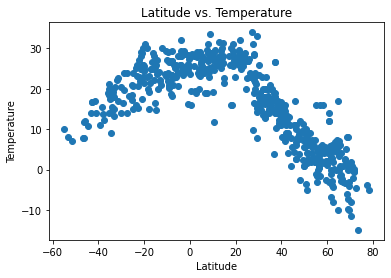

In [10]:
plt.scatter(clean_city_data['Latitude'],clean_city_data['Max Temp'])
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Latitude vs. Temperature')
plt.show()

## Latitude vs. Humidity Plot

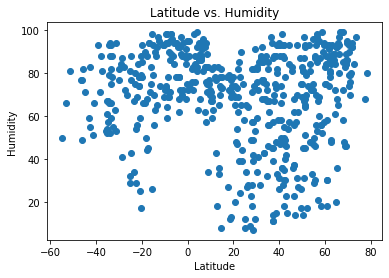

In [11]:
plt.scatter(clean_city_data['Latitude'],clean_city_data['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity')
plt.show()

## Latitude vs. Cloudiness Plot

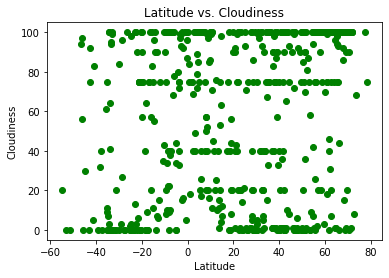

In [19]:
plt.scatter(clean_city_data['Latitude'],clean_city_data['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness')
plt.show()

## Latitude vs. Wind Speed Plot

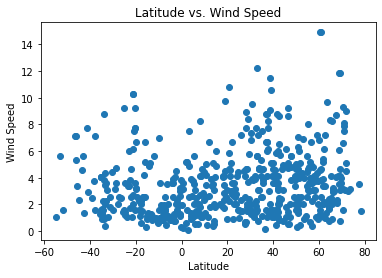

In [13]:
plt.scatter(clean_city_data['Latitude'],clean_city_data['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed')
plt.show()

## Linear Regression

In [14]:
South_Hem = clean_city_data.drop(clean_city_data[clean_city_data['Latitude'] > 0].index, inplace = False)
South_Hem
North_Hem = clean_city_data.drop(clean_city_data[clean_city_data['Latitude'] < 0].index, inplace = False)
North_Hem

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Thompson,75,CA,1619313930,46,55.7435,-97.8558,-3.00,3.60
1,Khani,100,GE,1619314086,93,41.9563,42.9566,8.00,1.03
2,Batagay-Alyta,100,RU,1619313992,72,67.8006,130.4114,-3.20,2.10
5,Hay River,99,CA,1619314086,58,60.8156,-115.7999,-3.00,4.63
6,Saskylakh,100,RU,1619313983,94,71.9167,114.0833,-0.27,4.50
...,...,...,...,...,...,...,...,...,...
550,Matara,26,LK,1619314168,88,5.9485,80.5353,25.01,1.32
551,Raudeberg,31,NO,1619314168,80,61.9875,5.1352,2.78,5.39
552,Porto Santo,20,PT,1619314168,77,33.0720,-16.3415,17.00,5.66
553,Okhotsk,3,RU,1619314009,57,59.3833,143.3000,-2.51,7.22


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

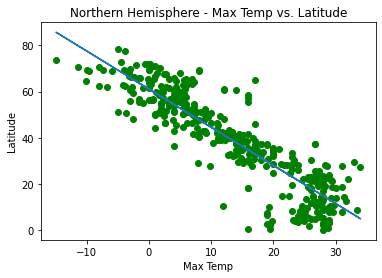

In [21]:
x_axis_value = North_Hem['Max Temp']
y_axis_value = North_Hem['Latitude']

corcoe = round(st.pearsonr(x_axis_value,y_axis_value)[0],2)

m, b = np.polyfit(x_axis_value, y_axis_value, 1)

plt.scatter(North_Hem['Max Temp'],North_Hem['Latitude'],c="green")
plt.title("Northern Hemisphere - Max Temp vs. Latitude")
plt.xlabel('Max Temp')
plt.ylabel('Latitude')
plt.plot(x_axis_value, m*x_axis_value + b)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

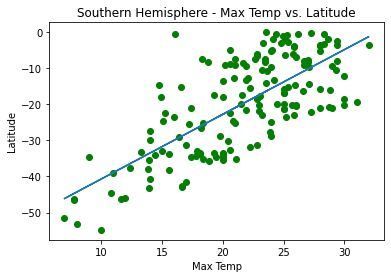

In [22]:
x_axis_value = South_Hem['Max Temp']
y_axis_value = South_Hem['Latitude']

corcoe = round(st.pearsonr(x_axis_value,y_axis_value)[0],2)

m, b = np.polyfit(x_axis_value, y_axis_value, 1)

plt.scatter(South_Hem['Max Temp'],South_Hem['Latitude'],c="green")
plt.title("Southern Hemisphere - Max Temp vs. Latitude")
plt.xlabel('Max Temp')
plt.ylabel('Latitude')
plt.plot(x_axis_value, m*x_axis_value + b)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

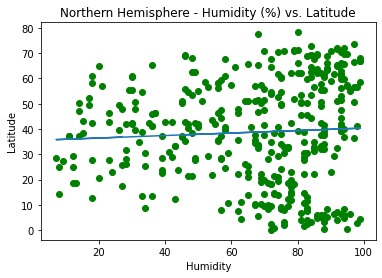

In [23]:
x_axis_value = North_Hem['Humidity']
y_axis_value = North_Hem['Latitude']

corcoe = round(st.pearsonr(x_axis_value,y_axis_value)[0],2)

m, b = np.polyfit(x_axis_value, y_axis_value, 1)

plt.scatter(North_Hem['Humidity'],North_Hem['Latitude'],c="green")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.plot(x_axis_value, m*x_axis_value + b)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

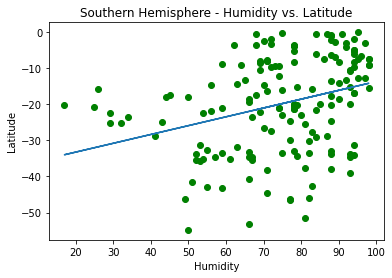

In [24]:
x_axis_value = South_Hem['Humidity']
y_axis_value = South_Hem['Latitude']

corcoe = round(st.pearsonr(x_axis_value,y_axis_value)[0],2)

m, b = np.polyfit(x_axis_value, y_axis_value, 1)

plt.scatter(South_Hem['Humidity'],South_Hem['Latitude'],c="green")
plt.title("Southern Hemisphere - Humidity vs. Latitude")
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.plot(x_axis_value, m*x_axis_value + b)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

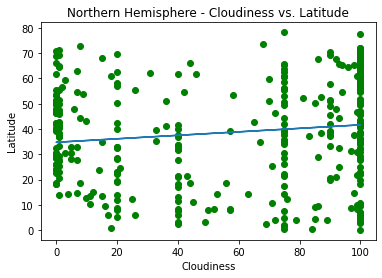

In [25]:
x_axis_value = North_Hem['Cloudiness']
y_axis_value = North_Hem['Latitude']

corcoe = round(st.pearsonr(x_axis_value,y_axis_value)[0],2)

m, b = np.polyfit(x_axis_value, y_axis_value, 1)

plt.scatter(North_Hem['Cloudiness'],North_Hem['Latitude'],c="green")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude")
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.plot(x_axis_value, m*x_axis_value + b)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

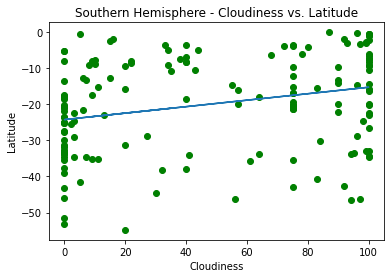

In [26]:
x_axis_value = South_Hem['Cloudiness']
y_axis_value = South_Hem['Latitude']

corcoe = round(st.pearsonr(x_axis_value,y_axis_value)[0],2)

m, b = np.polyfit(x_axis_value, y_axis_value, 1)

plt.scatter(South_Hem['Cloudiness'],South_Hem['Latitude'],c="green")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude")
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.plot(x_axis_value, m*x_axis_value + b)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

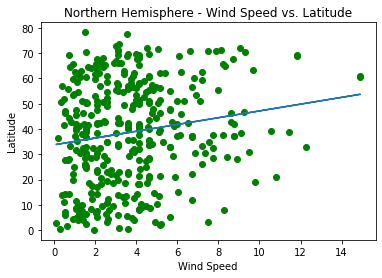

In [27]:
x_axis_value = North_Hem['Wind Speed']
y_axis_value = North_Hem['Latitude']

corcoe = round(st.pearsonr(x_axis_value,y_axis_value)[0],2)

m, b = np.polyfit(x_axis_value, y_axis_value, 1)

plt.scatter(North_Hem['Wind Speed'],North_Hem['Latitude'],c="green")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude")
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.plot(x_axis_value, m*x_axis_value + b)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

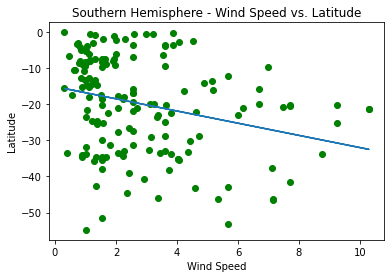

In [28]:
x_axis_value = South_Hem['Wind Speed']
y_axis_value = South_Hem['Latitude']

corcoe = round(st.pearsonr(x_axis_value,y_axis_value)[0],2)

m, b = np.polyfit(x_axis_value, y_axis_value, 1)

plt.scatter(South_Hem['Wind Speed'],South_Hem['Latitude'],c="green")
plt.title("Southern Hemisphere - Wind Speed vs. Latitude")
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.plot(x_axis_value, m*x_axis_value + b)